# Predict whether passengers survived or did not survive on the titanic based on the dataset provided

In [1]:
# import packages 

import pandas as pd # dataframes 
import numpy as np # linear algebra 

import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
%matplotlib inline

import warnings # turn off warnings for now
warnings.filterwarnings('ignore')

In [2]:
# preprocessing 

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# OneHotEncoder used to turn categorical variables (with no order/nominal) into numeric by giving each category a column 
# OrdinalEncoder used for categorical variables with order (ordinal)

In [3]:
# Machine learning

from sklearn.model_selection import cross_val_score, StratifiedKFold # K-fold cross validation
from sklearn.model_selection import train_test_split # training and testing data 

# machine learning models commonly used for classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [4]:
# import data 

# train and test data
train_original = pd.read_csv('/Users/nadiaparsell/csv_files/train.csv')
test_original = pd.read_csv('/Users/nadiaparsell/csv_files/test.csv')
pd.set_option('display.max_rows', 891)

In [5]:
train = train_original.copy()
test = test_original.copy()

In [6]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Data dictionary 

PassengerID is irrelevant 

Survived: 0=not survived, 1=survived

Pclass represents ticket class 1=1st class, 2=2nd class, 3=3rd class

Sex: female, male

Name 

Age 

SibSp: # of siblings / spouses aboard the Titanic

Parch: # of parents / children aboard the Titanic

Ticket: ticket number

Fare: price of fair

Cabin: cabin number

Embarked represnets port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

In [7]:
train.shape
# 891 observations and 12 features

(891, 12)

In [8]:
print(train.info())

print('----------------------------------------')

print(test.info())

# we can see that there is a decent number of missing values for age and cabin, and some for embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

There is a decent number of missing values for age and cabin, and some for embarked

Need to either impute or drop later

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# make column names all lowercase 
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [11]:
# passengerID is irrelevant so drop 
train.drop('passengerid', axis=1, inplace=True)
test.drop('passengerid', axis=1, inplace=True)

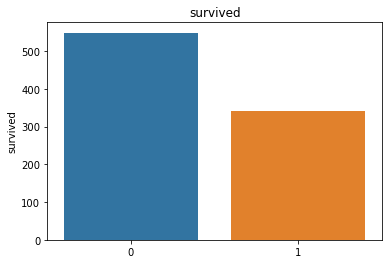

0    0.616162
1    0.383838
Name: survived, dtype: float64


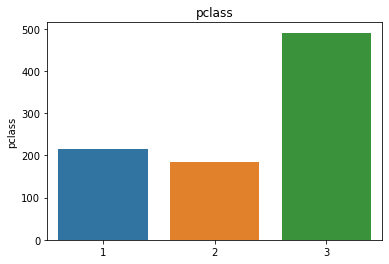

3    0.551066
1    0.242424
2    0.206510
Name: pclass, dtype: float64


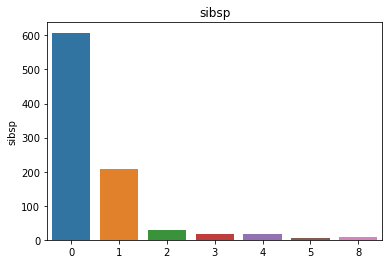

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: sibsp, dtype: float64


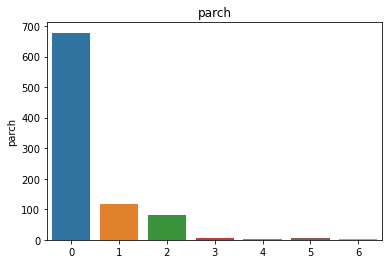

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: parch, dtype: float64


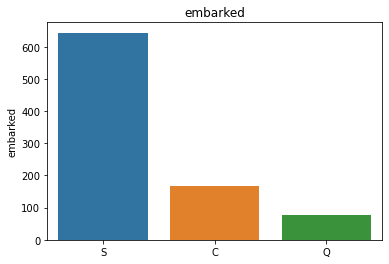

S    0.724409
C    0.188976
Q    0.086614
Name: embarked, dtype: float64


In [12]:
# Distribution of categorical values
cat_values = ['survived','pclass','sibsp','parch','embarked']

for feat in train[cat_values]:
    sns.barplot(train[feat].value_counts().index,train[feat].value_counts()).set_title(feat)
    plt.show()
    print(train[feat].value_counts(normalize=True))

Most passengers are male, in third class, by themselves, and embarked from S 

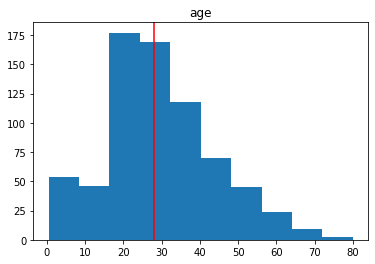

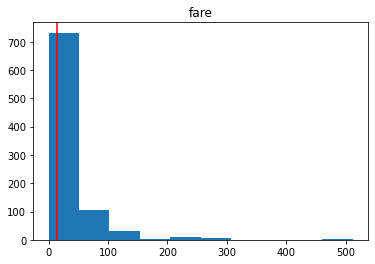

-------------------------------------------


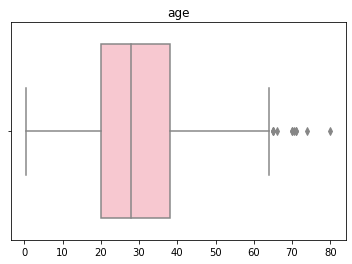

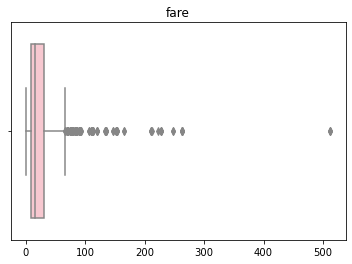

In [13]:
# histogram for numerical values

cat_values = ['age','fare']

# histograms 

for feat in train[cat_values]:
    plt.hist(train[feat])
    plt.title(feat)
    plt.axvline(train[feat].median(),0,1,color='red')
    plt.show()

print('-------------------------------------------')

for feat in train[cat_values]:  
    x = train[feat].values
    sns.boxplot(x, color = 'pink')
    plt.title(feat)
    plt.show()


# Fare has several outliers

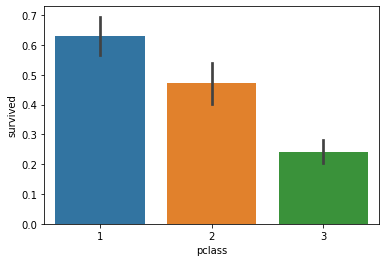

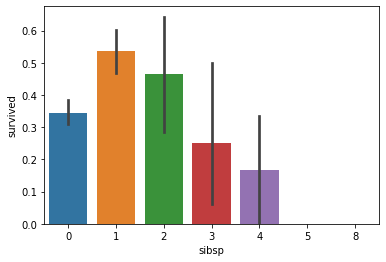

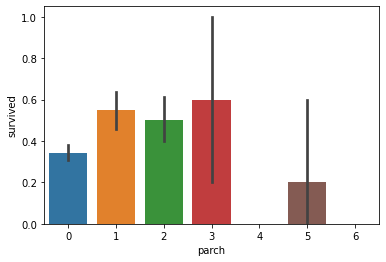

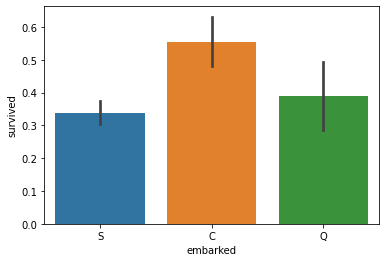

In [14]:
# check survival by feature 

# barplots
cat_values = ['pclass','sibsp','parch','embarked']

for feat in train[cat_values]:
    sns.barplot(x=feat, y='survived',data=train)
    plt.show()

Those in first class, women, and those who embarked from port C have greater chances of surviving 

Some of the cateogries in sibsp and parch have very large confidence intervals so may need to either drop or put in bins

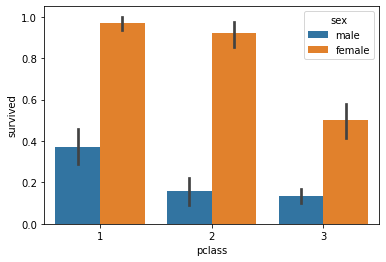

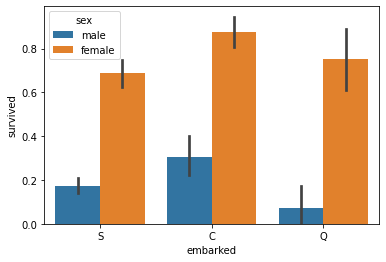

In [15]:
# lets see what the chances of survival by sex 

cat_values = ['pclass','embarked']

for feat in train[cat_values]:
    sns.barplot(x=feat, y='survived',data=train, hue='sex')
    plt.show()

14.4542
32.2042079685746


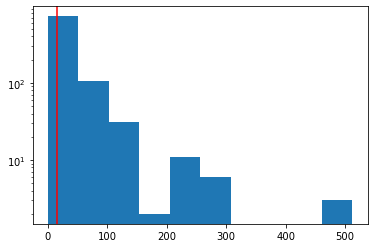

In [16]:
# median
print(train['fare'].median())

# mean 
print(train['fare'].mean())

# there is a big difference between median and mean 

# We can try to normalize the data first for fare
plt.hist(train['fare'], log=True)
plt.axvline(train['fare'].median(),0,1,color='red')
plt.show()

# it seems like there are still several outliers even after normalizing.
# might be better to remove or make age bins 

In [17]:
# look at missing data
print(train.isna().sum())

# drop the 2 missing values for embarked
train = train.dropna(subset=['embarked'])

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64


In [18]:
# drop cabin, too many missing values 

train.drop('cabin',axis=1, inplace = True)
test.drop('cabin',axis=1, inplace = True)

# impute age later

In [19]:
print(test.isna().sum())

# need to impute age and fare later

pclass       0
name         0
sex          0
age         86
sibsp        0
parch        0
ticket       0
fare         1
embarked     0
dtype: int64


In [20]:
train['name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: name, dtype: object

In [21]:
# lets pull out the title from the name 

# grab title from name
def fun(df):
    return df.split(', ')[1].split('.')[0]

train['name_title'] = train['name'].apply(fun)
test['name_title'] = test['name'].apply(fun)

Most people have the four titles: Mr, Miss, Mrs, and Master

In [22]:
# all of the titles among females 

filt = train['sex'] == 'female'
print(train[filt]['name_title'].value_counts())

print('-------------------------------------')

filt = train['sex'] == 'male'
print(train[filt]['name_title'].value_counts())

Miss            181
Mrs             124
Mlle              2
the Countess      1
Dr                1
Mme               1
Ms                1
Lady              1
Name: name_title, dtype: int64
-------------------------------------
Mr          517
Master       40
Dr            6
Rev           6
Col           2
Major         2
Jonkheer      1
Capt          1
Don           1
Sir           1
Name: name_title, dtype: int64


We know that females are more likely to survive, so lets group the rare female names together and the rare male names together 

In [23]:
# rare female 
train['name_title'] = train['name_title'].replace(['Mlle','Ms','the Countess','Lady','Mme'], 'rare_female')
test['name_title'] = test['name_title'].replace(['Dona','Ms'], 'rare_female')

In [24]:
# all of the tiles among males 
filt = train['sex'] == 'male'
print(train[filt]['name_title'].value_counts())

print('-------------------------------------')
filt = test['sex'] == 'male'
print(test[filt]['name_title'].value_counts())

Mr          517
Master       40
Dr            6
Rev           6
Col           2
Major         2
Jonkheer      1
Capt          1
Don           1
Sir           1
Name: name_title, dtype: int64
-------------------------------------
Mr        240
Master     21
Col         2
Rev         2
Dr          1
Name: name_title, dtype: int64


In [25]:
train['name_title'] = train['name_title'].replace(['Rev','Dr','Major','Col',
                                                'Don','Capt','Jonkheer','Sir'], 'rare_male')
test['name_title'] = test['name_title'].replace(['Rev','Dr','Col'], 'rare_male')

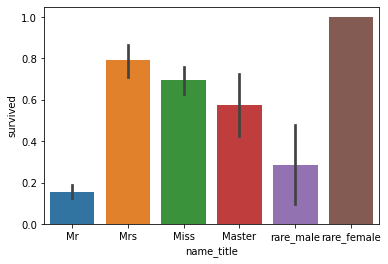

In [26]:
sns.barplot(x=train['name_title'], y='survived',data=train)
plt.show()

In [27]:
# # Now that we have the title, we can drop the name column
# train.drop('name', axis=1, inplace=True)
# test.drop('name', axis=1, inplace=True)

In [28]:
# take a look at the ticket column 

train['ticket'].head()
#train['ticket'].value_counts()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: ticket, dtype: object

In [29]:
# i dont see any clear pattern with ticket so I will drop it

train.drop('ticket', axis=1, inplace=True)
test.drop('ticket', axis=1, inplace=True)

In [30]:
# Take a look at the remaining null values 
train.isna().sum()

survived        0
pclass          0
name            0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        0
name_title      0
dtype: int64

In [31]:
#need to impute age 

train.head(15)

train[train['age'].isna()].head(15)

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,name_title
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,Mr
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,S,Mr
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,C,Mrs
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,7.2250,C,Mr
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,7.8792,Q,Miss
29,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,7.8958,S,Mr
31,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,146.5208,C,Mrs
32,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,7.7500,Q,Miss
36,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,7.2292,C,Mr
42,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,7.8958,C,Mr


In [32]:
# Lets check the median age of the common name titles

name_var = ['Mr', 'Master','Mrs','Miss']

median_vals = []
def name_title(df, name):
    filt = df['name_title'] == name
    median_age = train[filt]['age'].median()
    median_vals.append(median_age)
    return median_age
        
for name in name_var:
    print(name + ': ' + str(name_title(train, name)))

Mr: 30.0
Master: 3.5
Mrs: 35.0
Miss: 21.0


We can impute missing values for the age column depending on the name title since there is a clear difference in median age by name title

In [33]:
# impute age for the most common names 
def impute_age(df, name):
    for i, name_title in enumerate(name):
        filt = ((df['name_title'] == name_title) & (df['age'].isna()))
        df.loc[filt, 'age'] = median_vals[i]

impute_age(train,name_var)
impute_age(test,name_var)

In [34]:
# lets check how many missing age values we have left

print(train['age'].isna().sum())
print(test['age'].isna().sum())

1
1


In [35]:
# since there is only one missing left in the age section for both test and train, 
# we will impute with the median age

train['age'] = train['age'].fillna(train['age'].median())
test['age'] = test['age'].fillna(test['age'].median())

In [36]:
# we can combine sibsp and parch in a new column and see if the number of people 
# they came with affects survival 

train['family_size'] = train['sibsp'] + train['parch'] + 1
test['family_size'] = test['sibsp'] + test['parch'] + 1

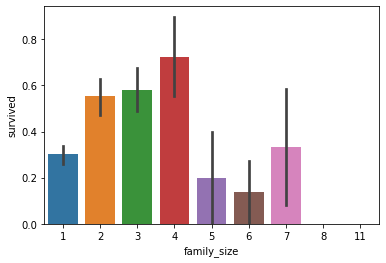

In [37]:
sns.barplot(x=train['family_size'], y='survived',data=train)
plt.show()

We can see that people who came on the ship alone and those with big family sizes had less chance of a survival. We can create bins

In [38]:
bins = [0,1,2,3,4,15]
labels = ['single','small_fam','med_fam','large_fam']

train['family_size_bins'] = pd.cut(train['family_size'],bins,labels)
test['family_size_bins'] = pd.cut(test['family_size'],bins,labels)

In [39]:
# # Now that we have family size categories, we can drop sibsp, parch, and family size

# train.drop(['sibsp','parch','family_size'], axis=1, inplace=True)
# test.drop(['sibsp','parch','family_size'], axis=1, inplace=True)

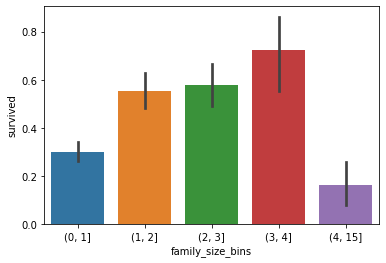

In [40]:
sns.barplot(x=train['family_size_bins'], y='survived',data=train)
plt.show()

We can see here that single people and those with large families had less chance of survival


In [41]:
# Now lets bin age

# different categories
bins = [0,2,10,14,17,25,60,100]
labels = ['infant', 'young child','older child','teenager',
         'young adult', 'adult', 'elderly']

train['age_bins'] = pd.cut(train['age'],bins,labels)
test['age_bins'] = pd.cut(test['age'],bins,labels)

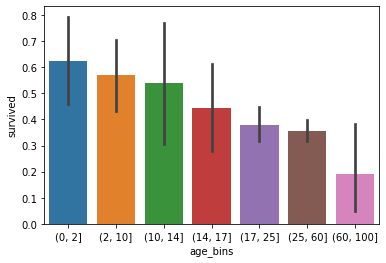

In [42]:
sns.barplot(x=train['age_bins'], y='survived',data=train)
plt.show()

Younger people overall were more likely to survive

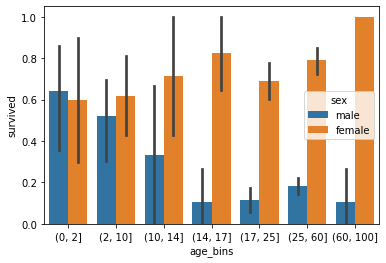

In [43]:
sns.barplot(x=train['age_bins'], y='survived',data=train, hue='sex')
plt.show()

survival is pretty similar between females and males for younger ages, but there is a drastic difference in survival from 14 and over 

In [44]:
# we can drop ages 

# train.drop('age', axis=1, inplace=True)
# test.drop('age', axis=1, inplace=True)

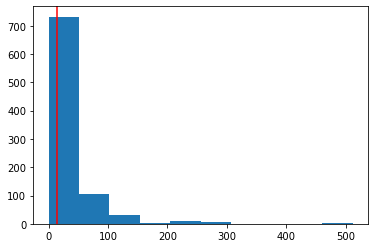

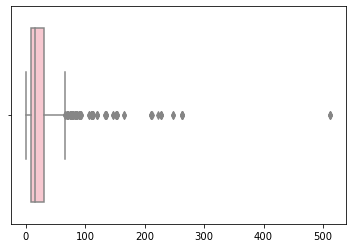

In [45]:
# lets see if we can bin fare 
plt.hist(train['fare'])
plt.axvline(train['fare'].median(),0,1,color='red')
plt.show()


x = train['fare'].values
sns.boxplot(x, color = 'pink')
plt.show()

We can clearly see that there are outliers for fare. We should definitely bin 

pclass              0
name                0
sex                 0
age                 0
sibsp               0
parch               0
fare                1
embarked            0
name_title          0
family_size         0
family_size_bins    0
age_bins            0
dtype: int64


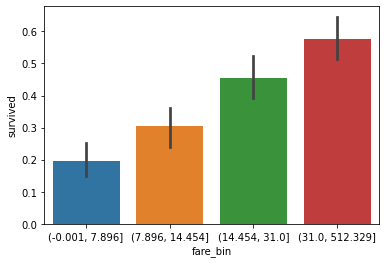

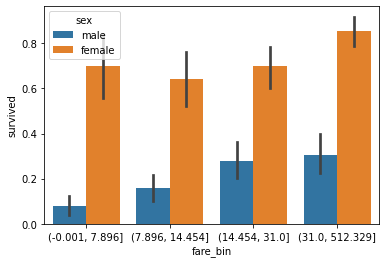

In [46]:
print(test.isna().sum())

filt = test['fare'].isna()
test[filt]

# lets impute with median fare 
test['fare'] = test['fare'].fillna(test['fare'].median())

# 4 equal bins for fare 

train['fare_bin'] = pd.qcut(train['fare'], 4)
test['fare_bin'] = pd.qcut(test['fare'], 4)

sns.barplot(x=train['fare_bin'], y='survived',data=train)
plt.show()

sns.barplot(x=train['fare_bin'], y='survived',data=train, hue='sex')
plt.show()

People who paid more had a higher chance of survival, especially females

In [48]:
print(test.isna().sum())

print('---------------------')

print(train.isna().sum())

pclass              0
name                0
sex                 0
age                 0
sibsp               0
parch               0
fare                0
embarked            0
name_title          0
family_size         0
family_size_bins    0
age_bins            0
fare_bin            0
dtype: int64
---------------------
survived            0
pclass              0
name                0
sex                 0
age                 0
sibsp               0
parch               0
fare                0
embarked            0
name_title          0
family_size         0
family_size_bins    0
age_bins            0
fare_bin            0
dtype: int64


Now that we have no more missing values, lets start dropping values we dont need anymore

In [49]:
train.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,name_title,family_size,family_size_bins,age_bins,fare_bin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,2,"(1, 2]","(17, 25]","(-0.001, 7.896]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,2,"(1, 2]","(25, 60]","(31.0, 512.329]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1,"(0, 1]","(25, 60]","(7.896, 14.454]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,2,"(1, 2]","(25, 60]","(31.0, 512.329]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,1,"(0, 1]","(25, 60]","(7.896, 14.454]"


In [50]:
# all of the columns to drop

# # Now that we have the title, we can drop the name column
train.drop('name', axis=1, inplace=True)
test.drop('name', axis=1, inplace=True)


# Now that we have family size categories, we can drop sibsp, parch, and family size
train.drop(['sibsp','parch','family_size'], axis=1, inplace=True)
test.drop(['sibsp','parch','family_size'], axis=1, inplace=True)

# we can drop ages 
train.drop('age', axis=1, inplace=True)
test.drop('age', axis=1, inplace=True)

train.drop('fare', axis=1, inplace=True)
test.drop('fare', axis=1, inplace=True)

In [51]:
train.head()

,survived,pclass,sex,embarked,name_title,family_size_bins,age_bins,fare_bin
0,0,3,male,S,Mr,"(1, 2]","(17, 25]","(-0.001, 7.896]"
1,1,1,female,C,Mrs,"(1, 2]","(25, 60]","(31.0, 512.329]"
2,1,3,female,S,Miss,"(0, 1]","(25, 60]","(7.896, 14.454]"
3,1,1,female,S,Mrs,"(1, 2]","(25, 60]","(31.0, 512.329]"
4,0,3,male,S,Mr,"(0, 1]","(25, 60]","(7.896, 14.454]"


In [52]:
# make sure that the test set still has the same number of rows
print(test_original.shape)
print(test.shape)

(418, 11)
(418, 7)


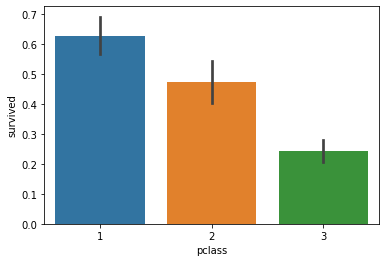

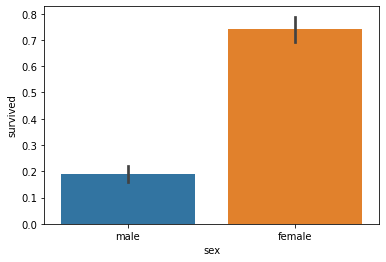

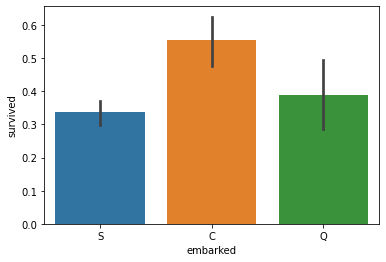

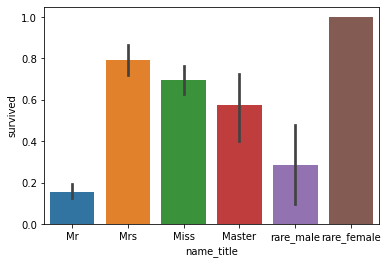

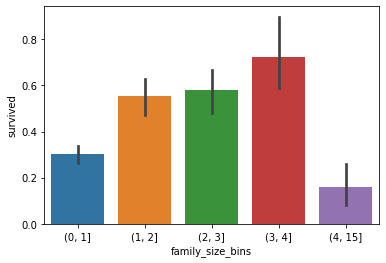

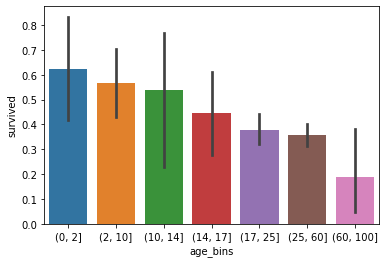

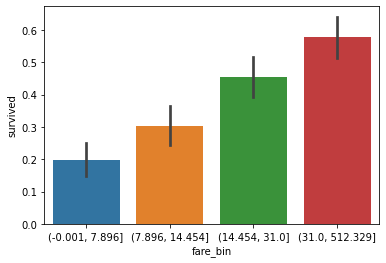

In [53]:
# check survival by feature 

# barplots
cat_values = ['pclass','sex','embarked','name_title','family_size_bins','age_bins','fare_bin']

for feat in train[cat_values]:
    sns.barplot(x=feat, y='survived',data=train)
    plt.show()

Now, we need to one hot encode our variables
OneHotEncoder for nominal data and OrdinalEncoder for ordinal data

In [54]:
train.isnull().sum()

survived            0
pclass              0
sex                 0
embarked            0
name_title          0
family_size_bins    0
age_bins            0
fare_bin            0
dtype: int64

In [55]:
# # Training data

ohe = OneHotEncoder(sparse=False)
train_X_encoded = pd.DataFrame(ohe.fit_transform(train[['sex','embarked','name_title','family_size_bins','age_bins','fare_bin']]))
train_X_encoded.columns = ohe.get_feature_names(['sex','embarked','name_title','family_size_bins','age_bins','fare_bin'])

In [56]:
y = train.loc[:,'survived']

In [57]:
train_X_encoded.isnull().sum()
train_X_encoded.shape

(889, 27)

In [58]:
from sklearn.model_selection import cross_val_score

model_scores = []

In [59]:
# knn hyper paramater tuning 

# from sklearn.grid_search import GridSearchCV
# k_range = range(1,31)

# param_grid = dict(n_neighbors=k_range)
# grid = GridSearchCV(knn, param_grid, cv=10,scoring='accuracy')
# grid.fit(train_X_encoded, y)


knn = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn, train_X_encoded, y, cv=10, scoring='accuracy')
print(scores)
knn_score = scores.mean()
print(knn_score)

model_scores.append(knn_score)

[0.75280899 0.83146067 0.75280899 0.78651685 0.83146067 0.76404494
 0.75280899 0.76404494 0.86516854 0.81818182]
0.7919305413687436


In [60]:
# logistic regression

lr = LogisticRegression(max_iter = 2000)
scores = cross_val_score(lr, train_X_encoded, y, cv=10)
print(scores)
lr_score = scores.mean()
print(scores.mean())

model_scores.append(lr_score)

[0.83146067 0.84269663 0.7752809  0.85393258 0.83146067 0.80898876
 0.80898876 0.78651685 0.84269663 0.85227273]
0.8234295199182838


In [61]:
# DecisionTreeClassifier

dtc = tree.DecisionTreeClassifier(random_state = 4)
scores = cross_val_score(dtc, train_X_encoded, y, cv=10)
print(scores)
dtc_score = scores.mean()
print(scores.mean())

model_scores.append(dtc_score)

[0.76404494 0.79775281 0.76404494 0.86516854 0.85393258 0.7752809
 0.76404494 0.75280899 0.80898876 0.78409091]
0.7930158324821246


In [62]:
# svc

svc = SVC(probability = True)
scores = cross_val_score(svc, train_X_encoded, y, cv=10)
print(scores)
svc_score = scores.mean()
print(scores.mean())

model_scores.append(svc_score)

[0.82022472 0.87640449 0.7752809  0.85393258 0.83146067 0.80898876
 0.82022472 0.78651685 0.85393258 0.85227273]
0.8279239019407558


In [63]:
# naive bayes

gnb = GaussianNB()
scores = cross_val_score(gnb, train_X_encoded, y, cv=10)
print(scores)
gnb_score = scores.mean()
print(scores.mean())

model_scores.append(gnb_score)

[0.68539326 0.78651685 0.73033708 0.80898876 0.78651685 0.79775281
 0.78651685 0.6741573  0.7752809  0.84090909]
0.7672369765066395


In [64]:
# random forest

rf = RandomForestClassifier(random_state = 4)
scores = cross_val_score(rf, train_X_encoded, y, cv=10)
print(scores)
rf_score = scores.mean()
print(scores.mean())

model_scores.append(rf_score)

[0.78651685 0.85393258 0.76404494 0.83146067 0.86516854 0.80898876
 0.79775281 0.78651685 0.85393258 0.78409091]
0.8132405515832483


In [65]:
# linear discriminant analysis 

lda = LinearDiscriminantAnalysis()
scores = cross_val_score(lda, train_X_encoded, y, cv=10)
print(scores)
lda_score = scores.mean()
print(scores.mean())

model_scores.append(lda_score)

[0.83146067 0.86516854 0.7752809  0.85393258 0.83146067 0.80898876
 0.82022472 0.78651685 0.85393258 0.85227273]
0.8279239019407558


In [66]:
# gradient boosting

gbc = GradientBoostingClassifier(random_state = 4)
scores = cross_val_score(gbc, train_X_encoded, y, cv=10)
print(scores)
gbc_score = scores.mean()
print(scores.mean())

model_scores.append(gbc_score)

[0.78651685 0.85393258 0.7752809  0.85393258 0.83146067 0.80898876
 0.82022472 0.7752809  0.85393258 0.79545455]
0.8155005107252299


In [67]:
# MLP 

mlp = MLPClassifier(random_state = 4)
scores = cross_val_score(mlp, train_X_encoded, y, cv=10)
print(scores)
mlp_score = scores.mean()
print(scores.mean())

model_scores.append(mlp_score)

[0.78651685 0.85393258 0.7752809  0.85393258 0.86516854 0.80898876
 0.80898876 0.7752809  0.86516854 0.85227273]
0.824553115423902


In [68]:
abc = AdaBoostClassifier(random_state = 4)
scores = cross_val_score(abc, train_X_encoded, y, cv=10)
print(scores)
abc_score = scores.mean()
print(scores.mean())

model_scores.append(abc_score)

[0.83146067 0.83146067 0.7752809  0.85393258 0.82022472 0.79775281
 0.80898876 0.79775281 0.83146067 0.85227273]
0.82005873340143


In [69]:
model_df = pd.DataFrame({'model': ['knn','lr','dtc','svc','gnb','rf','lda','gbc','mlp','abc'],
                        'scores': model_scores})

model_df.sort_values(by='scores', ascending=False)

,model,scores
3,svc,0.827924
6,lda,0.827924
8,mlp,0.824553
1,lr,0.823430
9,abc,0.820059
7,gbc,0.815501
5,rf,0.813241
2,dtc,0.793016
0,knn,0.791931
4,gnb,0.767237


# Next step, hyperparameter tuning